# Deep learning Practical Assignment #2

## Installing required packages

In [166]:
!pip install keras==2.7.0
!pip install pandas==1.1.5
!pip install tensorflow==2.7.0
!pip install numpy==1.19.5
!pip install scikit-learn==1.0.1
!pip install matplotlib==3.2.2

## Importing packages

In [167]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from tensorflow.keras.utils import to_categorical

import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from tensorflow.keras.optimizers import Adam 
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

##  Implementing fully connected dataset

### Toy Dataset

In [168]:
def prepareDataset(sigma1, sigma2):
    
        mean1 = [-1,0] 
        mean2 = [1,0]
      
        y=[]
        y[:125]=[-1]*125
        y[126:]=[1]*125   

        x = []
        x1 = np.random.normal(mean1, sigma1,size=(125,2))
        x2 = np.random.normal(mean2, sigma2,size=(125,2))
        x = np.concatenate((x1,x2),axis=0)
        x,y=shuffle(x,y)
        return(x,y)

def perceptron(data, y, n):
     W = np.zeros(data.shape[1])
     W_t = W
     for t in range(n):
        for X,Y in zip(data,y):
             if Y * np.inner(X,W) <= 0 :
                        W_t = W
                        W = W + Y * X
        if np.allclose(W,W_t):
            return W
     return W



In [169]:
x,y=prepareDataset(0.25,0.25)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


### using Keras

In [170]:

model = Sequential()
model.add(Flatten())
model.add(Dense(12, activation="relu", input_shape=(2,)))
model.add( Dense (5 , activation ='relu'))
model.add( Dense (3 , activation ='relu'))
model.add(Dense (2 , activation ='sigmoid'))

model.compile ( loss ="binary_crossentropy", optimizer ='adam' , metrics =['accuracy'])

model.fit (x_train , to_categorical(y_train) ,  epochs =25 , batch_size =10)
model.evaluate(np.array(x_test), np.array(to_categorical(y_test)))

Epoch 1/25
20/20 [==============================] - 1s 3ms/step - loss: 0.7096 - accuracy: 0.1350
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.8850
Epoch 3/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 1.0000
Epoch 4/25
20/20 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 1.0000
Epoch 5/25
20/20 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 1.0000
Epoch 7/25
20/20 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 1.0000
Epoch 8/25
20/20 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 1.0000
Epoch 9/25
20/20 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 1.0000
Epoch 10/25
20/20 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 1.0000
Epoch 11/25
20/20 [

[0.019781893119215965, 1.0]

### IRIS Dataset :

In [171]:
#loading iris dataset
irisData = load_iris()
x= irisData.data
y = irisData.target
#Splitting the dataset in training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, to_categorical(y), test_size=0.20)
iris_df = pd.DataFrame(data= np.c_[irisData['data'], irisData['target']],columns= irisData['feature_names'] + ['target'])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [172]:
''''In order to create a model we need to define the input/output sizes, the number of layers (nbLayers),
the number of nodes/Neurones per layer (nbNeurones) ,the activation functions (activationFuncs),
the learning rate(learningRate) (as well as the loss function(lossFunc) 
'''
def createModel(inputSize, outputSize, nbLayers, nbNeurones, activationFuncs, learningRate, lossFunc) :

  #Build the model layer by layer
  model = Sequential()
  model.add(Dense(nbNeurones[0] , input_dim =inputSize , activation = activationFuncs[0]))
  for i in range(1,(nbLayers-1)):
    model.add(Dense(nbNeurones[i], activation = activationFuncs[i]))
  model.add(Dense(outputSize ,activation = activationFuncs[-1]))

  #Compile the model
  model.compile(loss=lossFunc, optimizer=Adam(learning_rate=learningRate), metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) 

  #returning the model
  return (model)

#### MODEL1
- nbLayers=2
- nbNeurones= 20/Layer1,3/Layer2
- activation functions= relu,softmax
- learning rate =0.001
- loss function = categorical_crossentropy

In [173]:
model1=createModel(x_train.shape[1],y_train.shape[1],2,[20, 3],['relu','softmax'],0.001,'categorical_crossentropy')
training1=model1.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res1=model1.evaluate(np.array(x_test), np.array(y_test),verbose=0)

#### MODEL2: adding more layers as well as nodes
- nbLayers=5
- nbNeurones= 40/Layer1,20/Layer2,10/Layer3,5/Layer4,3/Layer5
- activation functions= relu/for all ,softmax/the last layer
- learning rate =0.001
- loss function = categorical_crossentropy

In [174]:
model2=createModel(x_train.shape[1],y_train.shape[1],5,[40,20,10,5,3],['relu','relu','relu','relu','softmax'],0.001,'categorical_crossentropy')
training2=model2.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res2=model2.evaluate(np.array(x_test), np.array(y_test),verbose=0)

#### MODEL3: changing the activation function to sigmoid
- nbLayers=2
- nbNeurones= 20/Layer1,3/Layer2
- activation functions= relu,sigmoid
- learning rate =0.001
- loss function = categorical_crossentropy

In [175]:
model3=createModel(x_train.shape[1],y_train.shape[1],2,[20, 3],['relu','sigmoid'],0.001,'categorical_crossentropy')
training3=model3.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res3=model3.evaluate(np.array(x_test), np.array(y_test),verbose=0)

#### MODEL4: changing the loss function to kl_divergence
- nbLayers=2
- nbNeurones= 20/Layer1,3/Layer2
- activation functions= relu ,softmax
- learning rate =0.001
- loss function = kl_divergence

In [176]:
model4=createModel(x_train.shape[1],y_train.shape[1],2,[20, 3],['relu','softmax'],0.001,'kl_divergence')
training4=model4.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res4=model4.evaluate(np.array(x_test), np.array(y_test),verbose=0)

In [177]:
metrics=['loss','accuracy','precision','Recall']
results=[res1,res2,res3,res4]
for i in metrics:
    print(i)
    for j in results:
        print(str(j[metrics.index(i)])+"  ",end="")
    print('\n')

loss
0.6720422506332397  0.39094072580337524  0.5725737810134888  0.6074615716934204  

accuracy
0.699999988079071  0.9666666388511658  0.9666666388511658  0.8999999761581421  

precision
0.8888888955116272  0.95652174949646  0.5  0.949999988079071  

Recall
0.5333333611488342  0.7333333492279053  1.0  0.6333333253860474  



### Conclusion
- The second model got the best results: the highest accuracy,precision ,recall and the lowest loss => the more layers and nodes you have , the better the model is!
- With all other parameters kept invariant,when we changed the activation function to sigmoid ( in the laast layer), the results got better => sigmoid is better than softmax
- With all other parameters kept invariant, when we changed the loss function to kl_divergence , the accuracy, recall, precision got higher comparing to the first model and the loss got even lesser=> It is better for this dataset to choose kl_divergence as the loss function.

=> the best combination :
- nbLayers=5
- nbNeurones= 40/Layer1,20/Layer2,10/Layer3,5/Layer4,3/Layer5
- activation functions= relu/for all ,softmax/the last layer
- learning rate =0.001
- loss function = categorical_crossentropy

##  Working towards the CNN :

### Digit Dataset

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 216x216 with 0 Axes>

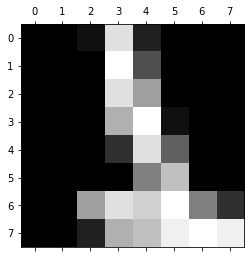

In [178]:
digits=load_digits()
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, to_categorical(y), test_size=0.2, stratify=y, random_state=42)
 # Display the digit 1000 
plt.figure(1, figsize=(3, 3))
plt.gray()
plt.matshow(digits.images[1000])
print(to_categorical(y)[1000])

#### MODEL0:
- nbLayers=2
- nbNeurones= 64/Layer1,10/Layer2
- activation functions= relu,softmax
- learning rate =0.001
- loss function = categorical_crossentropy

In [179]:
model0=createModel(x_train.shape[1],y_train.shape[1],2,[64, 10],['relu','softmax'],0.001,'categorical_crossentropy')
training0=model0.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res0=model0.evaluate(np.array(x_test), np.array(y_test))


12/12 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9833 - precision_82: 0.9833 - recall_82: 0.9833


=> Our model gave a high  accuracy (>98% )=>We can say that this model is performant in terms of accuracy.

#### MODEL1:increasing the number of layers
- nbLayers=5
- nbNeurones= 64/Layer1,32/Layer2,24/Layer3,16/Layer4,10/layer5
- activation functions= relu/all except thelast one ,softmax
- learning rate =0.001
- loss function = categorical_crossentropy

In [180]:
model1=createModel(x_train.shape[1],y_train.shape[1],5,[64,32,24,16, 10],['relu','relu','relu','relu','softmax'],0.001,'categorical_crossentropy')
training1=model1.fit(x_train, y_train, epochs=25, batch_size=10, verbose=0)
res1=model1.evaluate(np.array(x_test), np.array(y_test))


12/12 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9806 - precision_83: 0.9832 - recall_83: 0.9778


=> After increasing the number of layers, the accuracy decreased => Incresing the number of layers is not the right way to get a better model.

### Face dataset

In [181]:
faces=fetch_olivetti_faces()
X=faces.data
y=faces.target
x_train, x_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.2, random_state=42)

<Figure size 216x216 with 0 Axes>

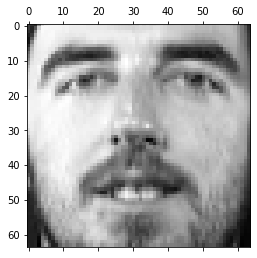

In [182]:
 # Display the first digit
plt.figure(1, figsize=(3, 3))
plt.gray()
plt.matshow(faces.images[100])

In [183]:
#### MODEL1:
- nbLayers=4
- nbNeurones= 128/Layer1,128/Layer2,64/Layer3,40/layer4
- activation functions= relu/all except thelast one ,softmax
- learning rate =0.001
- loss function = categorical_crossentropy

SyntaxError: invalid syntax (942814492.py, line 4)

In [ ]:
model1=createModel(x_train.shape[1],y_train.shape[1],4,[256,128,64,40],['relu','relu','relu','softmax'],0.001,'categorical_crossentropy')
training1=model1.fit(x_train, y_train, epochs=20, batch_size=10, verbose=0)
res1=model1.evaluate(np.array(x_test), np.array(y_test))

#### MODEL2:
- nbLayers=2
- nbNeurones= 128/Layer1,40/Layer2
- activation functions= relu/all except thelast one ,softmax
- learning rate =0.001
- loss function = categorical_crossentropy

In [ ]:
model2=createModel(x_train.shape[1],y_train.shape[1],3,[256,256,40],['relu','relu','softmax'],0.001,'categorical_crossentropy')
training2=model1.fit(x_train, y_train, epochs=20, batch_size=10, verbose=0)
res2=model1.evaluate(np.array(x_test), np.array(y_test))


=> WE GOT A BETTER MODLE!( accuracy >80%)

## conclusion 
- we have got the  best results with an architecture based on 3 layers , the first two layers have 256 neurones and the last one has 40 neurones.We have also descreased the number of layers comparing to the model1
=> The more neurones you have , the better the results and definitely  the higher the complexity!
For this, we need a more connected model  =>  migration to CNN especially when the inputs are images.